<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r14_i1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-malicious-n-0-15-m-1-r14.csv?token=AKVFSOGB6S7RAKQUAAVTNXK63JIHY')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-normal-n-0-15-r14.csv?token=AKVFSOHJYT5RRJZ4HXHQ5RS63JIJG')


In [0]:
df = df1.append(df9, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [5]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,88,4,2,1,1,4,3,9,15,15,24,8,4,4,1,0.250000,8,14,1,14,14,8,16,3,27,0
1,88,4,2,1,1,4,3,9,15,15,24,8,3,4,1,0.250000,8,11,1,11,11,8,12,3,27,1
2,206,3,2,1,1,4,3,9,15,15,22,6,5,3,1,0.333333,8,10,2,11,20,6,20,3,27,1
3,206,3,2,1,1,4,3,9,15,15,22,6,7,3,1,0.333333,8,13,2,14,26,6,28,3,27,0
4,398,4,2,1,1,4,3,9,15,15,21,5,13,4,1,0.250000,8,12,3,14,36,8,52,3,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78900,3276659,3,2,5,2,2,3,9,15,15,22,6,30093,3,1,0.333333,15,5,15,19,75,6,601860,15,135,0
78901,3276666,3,2,5,3,2,3,9,15,15,22,6,30093,3,1,0.333333,22,4,16,19,64,6,902790,15,135,0
78902,3276673,3,2,5,4,2,3,9,15,15,22,6,30093,3,1,0.333333,29,3,17,19,51,6,1203720,15,135,0
78903,3276680,3,2,5,5,3,3,9,15,15,22,6,30093,3,1,0.333333,36,2,18,19,36,6,2256975,15,135,0


In [6]:
df.shape

(78905, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-malicious-n-0-15-m-11-r14.csv?token=AKVFSOH66ZAW6U6NJIEDAWK63JIH6')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-malicious-n-0-15-m-12-r14.csv?token=AKVFSOCCWK2AKL76QQQFCWK63JIXI')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r14/2-fft-malicious-n-0-15-m-7-r14.csv?token=AKVFSOFFLTHP6UWBLP76WXK63JIXM')


In [8]:
print(df13.shape)
print(df14.shape)
print(df15.shape)

(43609, 26)
(58074, 26)
(43609, 26)


Processing

In [9]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [11]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.236573,-0.039192,0.028991,-0.043217,NaN,-0.098373,-0.016079,0.403477,-0.500784,-0.684885,-0.149691,-0.104903,-0.116378,-0.172437,-0.162569,0.704309,-0.019516,-0.039192,-0.064388,0.077857
inport,-0.236573,1.000000,0.006412,0.006284,-0.009367,NaN,-0.406696,0.077825,0.257920,0.555203,0.519427,0.209129,0.036345,-0.052017,-0.012213,-0.010893,0.500254,0.054553,0.006412,-0.100907,-0.024173
cache_coherence_type,-0.039192,0.006412,1.000000,0.395503,-0.589568,NaN,-0.194987,0.054133,-0.046493,-0.097203,-0.143776,-0.440541,0.061034,-0.000819,0.046924,0.043894,-0.022289,0.345084,1.000000,0.968468,-0.024293
flit_id,0.028991,0.006284,0.395503,1.000000,-0.055952,NaN,-0.251034,0.015206,0.019323,0.007976,-0.022541,0.511725,-0.010907,0.002647,-0.006436,0.003840,0.049603,0.696561,0.395503,0.339785,0.006295
flit_type,-0.043217,-0.009367,-0.589568,-0.055952,1.000000,NaN,0.374211,-0.022668,-0.028804,-0.011889,0.033601,0.529536,-0.106937,0.121810,0.011590,0.006332,-0.073943,0.069757,-0.589568,-0.506511,-0.009383
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,-0.098373,-0.406696,-0.194987,-0.251034,0.374211,NaN,1.000000,-0.001737,-0.264056,-0.277846,-0.297355,0.033522,-0.029588,0.145432,0.090274,0.080946,-0.363186,-0.113816,-0.194987,0.048499,-0.024962
traversal_id,-0.016079,0.077825,0.054133,0.015206,-0.022668,NaN,-0.001737,1.000000,-0.020765,0.022906,0.019809,0.027445,0.162087,0.163034,0.253356,0.190474,0.042726,0.524788,0.054133,0.049907,-0.336477
hop_count,0.403477,0.257920,-0.046493,0.019323,-0.028804,NaN,-0.264056,-0.020765,1.000000,0.366403,-0.145417,0.155376,-0.077895,-0.128184,-0.160591,-0.134850,0.459709,-0.020933,-0.046493,-0.115568,0.013805
current_hop,-0.500784,0.555203,-0.097203,0.007976,-0.011889,NaN,-0.277846,0.022906,0.366403,1.000000,0.755078,0.372391,0.092103,-0.047823,0.034506,0.039961,-0.125833,-0.007565,-0.097203,-0.165230,-0.042252


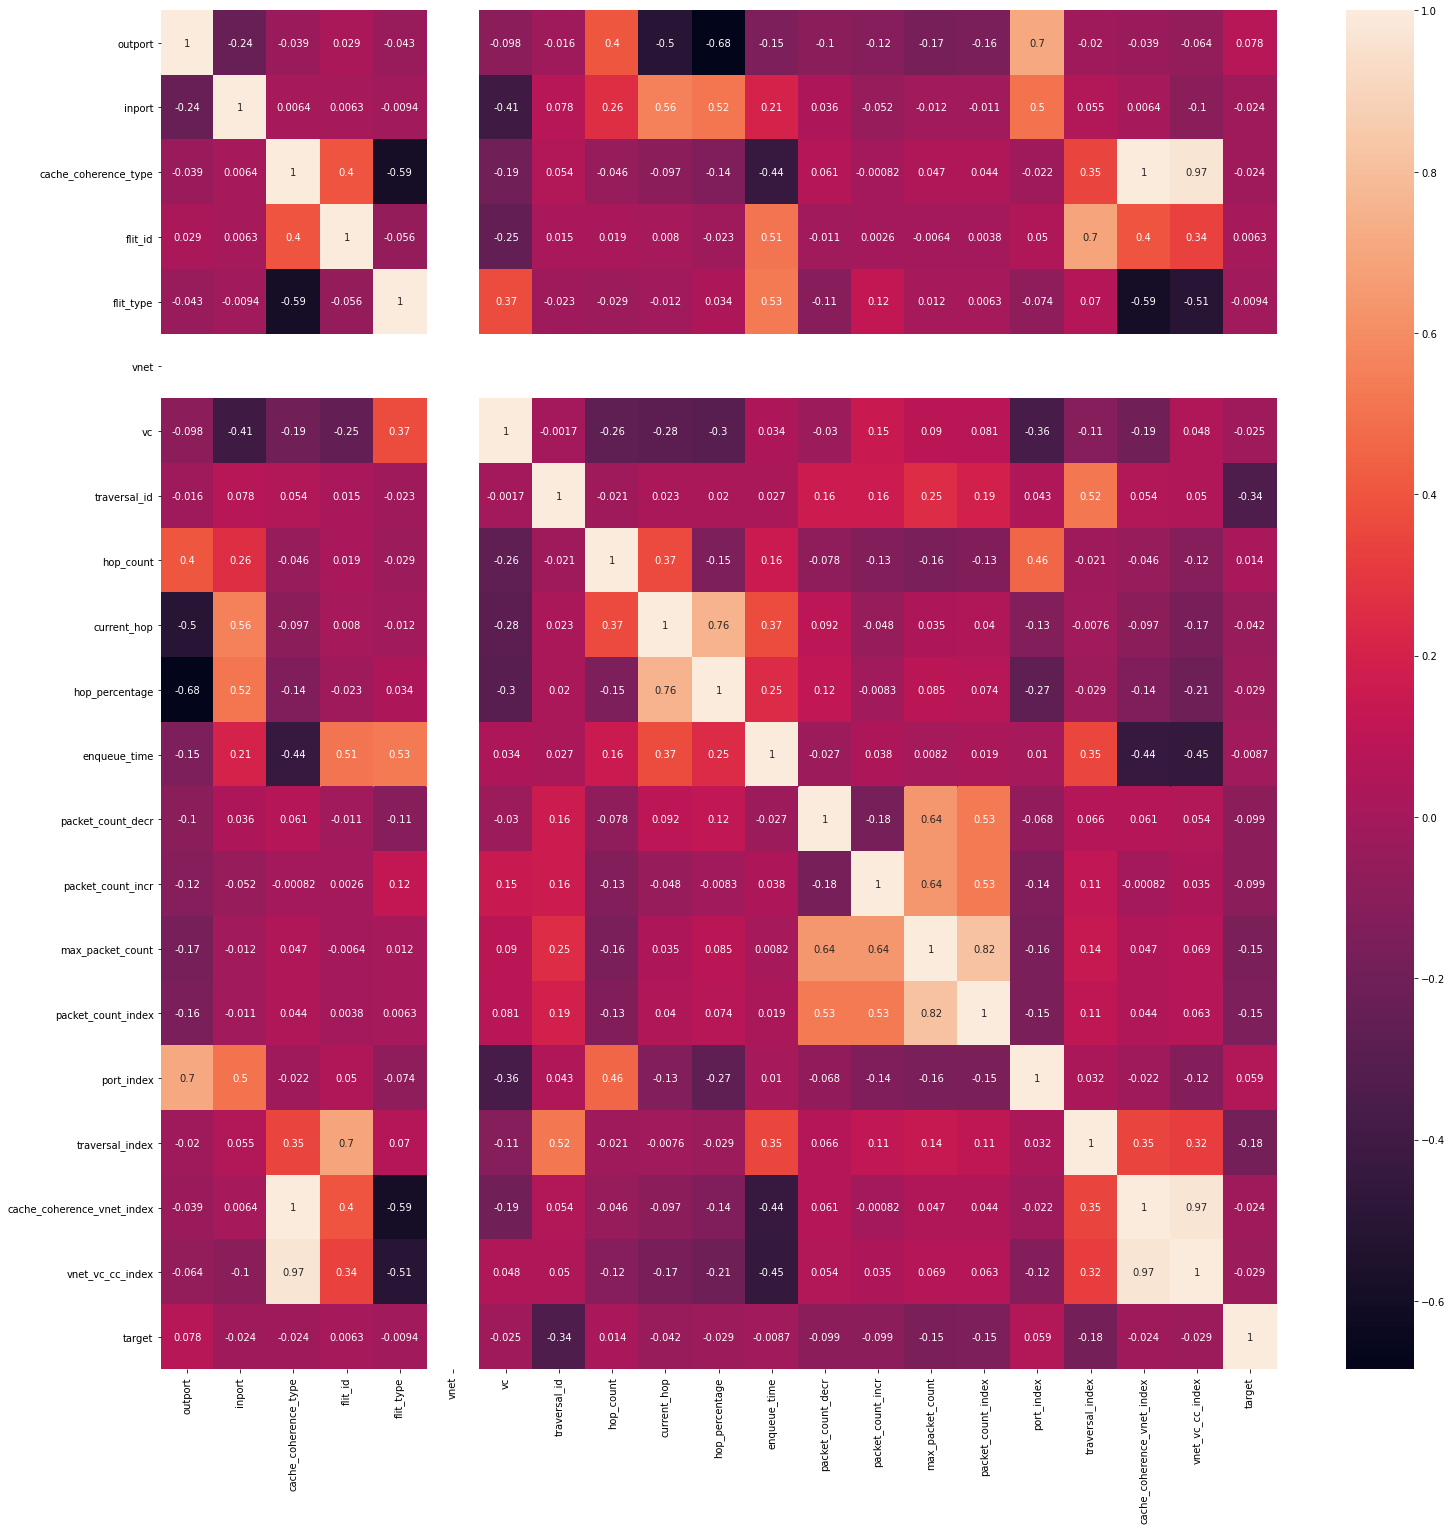

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [14]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'cache_coherence_type']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

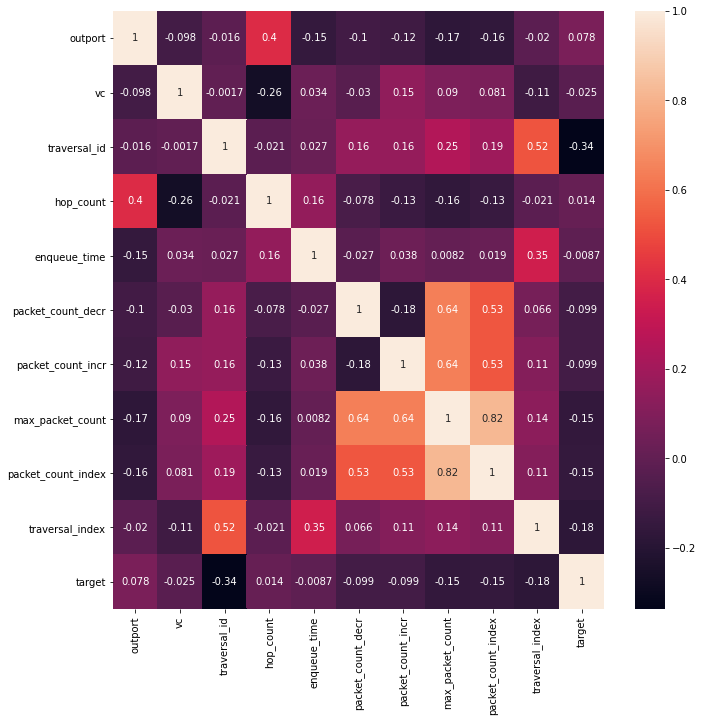

In [16]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

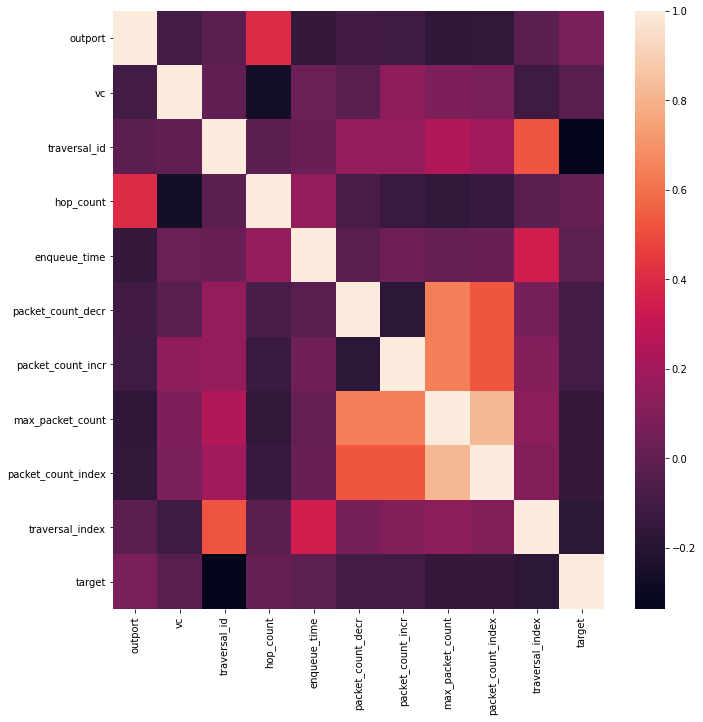

In [17]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [19]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.00,0.000000,0.000033,0.6,0.066667,0.13,0.00,0.13,0.005000,0.000001
1,1.00,0.000000,0.000000,0.6,0.066667,0.10,0.00,0.10,0.003846,0.000000
2,0.75,0.000000,0.000066,0.4,0.066667,0.09,0.01,0.10,0.007308,0.000003
3,0.75,0.000000,0.000133,0.4,0.066667,0.12,0.01,0.13,0.009615,0.000006
4,1.00,0.000000,0.000332,0.6,0.066667,0.11,0.02,0.13,0.013462,0.000015
...,...,...,...,...,...,...,...,...,...,...
78900,0.75,0.000000,0.999967,0.4,0.183333,0.04,0.14,0.18,0.028462,0.222278
78901,0.75,0.000000,0.999967,0.4,0.300000,0.03,0.15,0.18,0.024231,0.333419
78902,0.75,0.000000,0.999967,0.4,0.416667,0.02,0.16,0.18,0.019231,0.444560
78903,0.75,0.000000,0.999967,0.4,0.533333,0.01,0.17,0.18,0.013462,0.833554


In [20]:
train_X[train_X.duplicated()].shape

(19, 10)

In [21]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.00,0.000000,0.000000,0.6,0.062500,0.131313,0.000000,0.131313,0.005100,0.000000
1,0.75,0.000000,0.000100,0.4,0.062500,0.121212,0.010101,0.131313,0.009808,0.000004
2,1.00,0.000000,0.000299,0.6,0.062500,0.111111,0.020202,0.131313,0.013731,0.000013
3,1.00,0.000000,0.000399,0.8,0.062500,0.101010,0.030303,0.131313,0.016869,0.000018
4,1.00,0.000000,0.000598,0.8,0.062500,0.090909,0.040404,0.131313,0.019223,0.000027
...,...,...,...,...,...,...,...,...,...,...
43604,0.75,0.000000,0.999967,0.4,0.171875,0.040404,0.010101,0.050505,0.003531,0.222276
43605,0.75,0.000000,0.999967,0.4,0.281250,0.030303,0.020202,0.050505,0.004315,0.333417
43606,0.75,0.000000,0.999967,0.4,0.390625,0.020202,0.030303,0.050505,0.004315,0.444559
43607,0.75,0.000000,0.999967,0.4,0.500000,0.010101,0.040404,0.050505,0.003531,0.833554


In [22]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [23]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [25]:
train_Y = df['target']
train_Y.value_counts()

0    43400
1    35505
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs       Score
2        traversal_id  888.572727
9     traversal_index  318.465656
8  packet_count_index  159.336636
7    max_packet_count  140.805279
5   packet_count_decr   71.034158
6   packet_count_incr   69.773482
0             outport   51.456245
1                  vc   23.445744
3           hop_count    1.596700
4        enqueue_time    0.179626


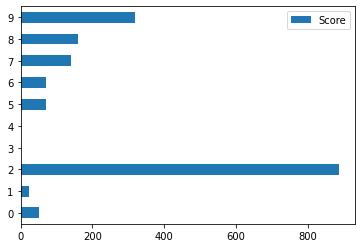

In [28]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [33]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 97.50312109862672
Test Prediction Score 95.58354775529014


In [34]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 79.6532825792841
Test Prediction Score 77.384027275545
Test Prediction Score 80.85028319842235


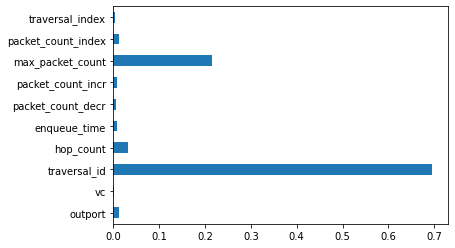

In [35]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

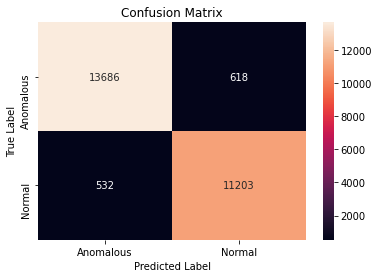

In [36]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [37]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     14304
           1       0.95      0.95      0.95     11735

    accuracy                           0.96     26039
   macro avg       0.96      0.96      0.96     26039
weighted avg       0.96      0.96      0.96     26039



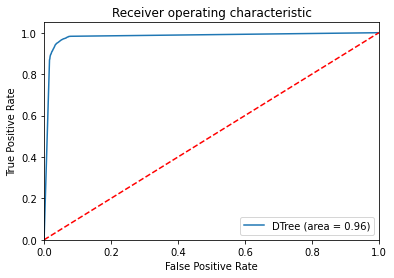

In [38]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [40]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r14l-i1.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [43]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.97919267582189
Test Prediction Score 99.46618533737855


In [44]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 80.94888669770002
Test Prediction Score 79.25405517098874
Test Prediction Score 82.05416313146368


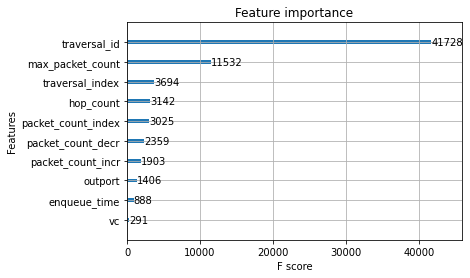

In [45]:
plot_importance(xgbc)
plt.show()

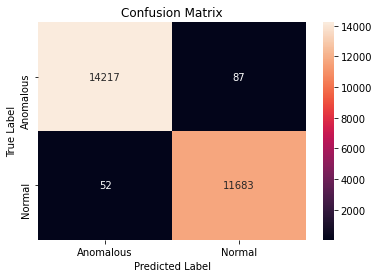

In [46]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [47]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14304
           1       0.99      1.00      0.99     11735

    accuracy                           0.99     26039
   macro avg       0.99      0.99      0.99     26039
weighted avg       0.99      0.99      0.99     26039



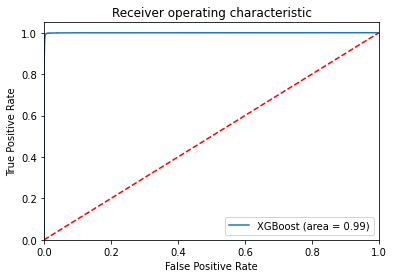

In [48]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()